In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

Step 1: Data Preparation

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
mapdf=pd.read_csv('/content/drive/MyDrive/Cognorise ML/twitter/Mapping.csv')
print(mapdf.head())

   Unnamed: 0 emoticons  number
0           0         😜       0
1           1         📸       1
2           2         😍       2
3           3         😂       3
4           4         😉       4


In [ ]:
traindf=pd.read_csv('/content/drive/MyDrive/Cognorise ML/twitter/Train.csv')
print(traindf.head())

   Unnamed: 0                                               TEXT  Label
0           0  Vacation wasted ! #vacation2017 #photobomb #ti...      0
1           1  Oh Wynwood, you’re so funny! : @user #Wynwood ...      1
2           2  Been friends since 7th grade. Look at us now w...      2
3           3  This is what it looks like when someone loves ...      3
4           4  RT @user this white family was invited to a Bl...      3


In [ ]:
opdf=pd.read_csv('/content/drive/MyDrive/Cognorise ML/twitter/OutputFormat.csv')
print(opdf.head())

     id    Label
0  id_1  Label_1
1  id_2  Label_2
2  id_3  Label_3
3  id_4  Label_4
4  id_5  Label_5


In [ ]:
testdf=pd.read_csv('/content/drive/MyDrive/Cognorise ML/twitter/Test.csv')
print(testdf.head())

   Unnamed: 0  id                                               TEXT
0           0   0  Thought this was cool...#Repost (get_repost)・・...
1           1   1  Happy 4th! Corte madera parade. #everytownusa ...
2           2   2  Luv. Or at least something close to it. @ Unio...
3           3   3  There's a slice of pie under that whipped crea...
4           5   5  #thankyou for your thank you We adore you both...



Use the mapdf to get the mapping of emojis to numbers




In [ ]:
X = traindf['TEXT']
y = traindf['Label']


In [ ]:
print(X.shape)
print(y.shape)

(70000,)
(70000,)


Split the data into training and validation sets

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(56000,)
(14000,)
(56000,)
(14000,)


Step 2: Building the Model

ALGORITHM 1:
LOGISTIC REGRESSION

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=10000, ngram_range=(1, 2))),
    ('clf', LogisticRegression(max_iter=1000))
])


In [ ]:
pipeline.fit(X_train, y_train)


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=10000, ngram_range=(1, 2))),
                ('clf', LogisticRegression(max_iter=1000))])

In [ ]:
y_pred = pipeline.predict(X_val)
print('Accuracy:', accuracy_score(y_val, y_pred))
print('Classification Report:\n', classification_report(y_val, y_pred))


Accuracy: 0.32921428571428574
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       282
           1       0.30      0.16      0.21       531
           2       0.27      0.26      0.26      1408
           3       0.34      0.51      0.41      1384
           4       0.04      0.00      0.01       372
           5       0.65      0.56      0.60       387
           6       0.17      0.05      0.08       431
           7       0.43      0.45      0.44       875
           8       0.24      0.02      0.03       377
           9       0.30      0.74      0.43      3049
          10       0.18      0.01      0.02       355
          11       0.70      0.43      0.53       509
          12       0.43      0.33      0.37       370
          13       0.34      0.15      0.21       644
          14       0.38      0.05      0.09       466
          15       0.22      0.03      0.06       728
          16       0.28    

Step 3: Predicting on Test Data

In [ ]:
test_texts = testdf['TEXT']
test_predictions = pipeline.predict(test_texts)


In [ ]:
print(test_predictions)

[ 7 11  3 ...  1  2  9]


In [ ]:
output = pd.DataFrame({'id': testdf['id'], 'Label': test_predictions})
output.to_csv('/content/drive/MyDrive/Cognorise ML/twitter/Predictions.csv', index=False)


In [ ]:
import joblib

In [ ]:
# Save the trained model
joblib.dump(pipeline, '/content/drive/MyDrive/Cognorise ML/twitter/emoji_predictor.pkl')


['/content/drive/MyDrive/Cognorise ML/twitter/emoji_predictor.pkl']

In [ ]:
# Load the saved model (for future use)
pipeline = joblib.load('/content/drive/MyDrive/Cognorise ML/twitter/emoji_predictor.pkl')


In [ ]:
def predict_emoji(text):
    # Predict the label for the input text
    prediction = pipeline.predict([text])
    # Return the predicted label
    return prediction[0]

# Example usage
input_text = input()
predicted_label = predict_emoji(input_text)
print(f"The predicted emoji label for the input text is: {predicted_label}")


Wow
The predicted emoji label for the input text is: 2


In [ ]:
# Load the mapping
mapdf = pd.read_csv('/content/drive/MyDrive/Cognorise ML/twitter/Mapping.csv')

# Function to map label to emoji
def get_emoji(label):
    return mapdf[mapdf['number'] == label]['emoticons'].values[0]

# Example usage
predicted_emoji = get_emoji(predicted_label)
print(f"The predicted emoji for the input text is: {predicted_emoji}")


The predicted emoji for the input text is: 😍


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Prepare the test data
X_test = testdf['TEXT']


# Vectorize the text data
vectorizer = CountVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

# 1. Naive Bayes Classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vect, y_train)
nb_pred = nb_classifier.predict(X_train_vect)
nb_accuracy = accuracy_score(y_train, nb_pred)
print("\nNaive Bayes Classifier")
print("Accuracy:", nb_accuracy)
print("Classification Report:\n", classification_report(y_train, nb_pred))




Naive Bayes Classifier
Accuracy: 0.4211964285714286
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.05      0.09      1275
           1       0.92      0.23      0.37      2061
           2       0.65      0.39      0.49      5668
           3       0.53      0.66      0.59      5458
           4       1.00      0.05      0.09      1506
           5       0.86      0.33      0.48      1590
           6       0.98      0.18      0.30      1652
           7       0.74      0.52      0.61      3488
           8       0.99      0.04      0.08      1615
           9       0.30      0.97      0.46     12042
          10       1.00      0.05      0.09      1366
          11       0.89      0.35      0.50      1925
          12       0.72      0.20      0.31      1539
          13       0.82      0.18      0.30      2606
          14       0.93      0.08      0.15      1876
          15       0.90      0.10      0.18      3115
    

In [ ]:
# 2. Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_vect, y_train)
rf_pred = rf_classifier.predict(X_train_vect)
rf_accuracy = accuracy_score(y_train, rf_pred)
print("\nRandom Forest Classifier")
print("Accuracy:", rf_accuracy)
print("Classification Report:\n", classification_report(y_train, rf_pred))




Random Forest Classifier
Accuracy: 0.9975535714285715
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1275
           1       1.00      1.00      1.00      2061
           2       1.00      1.00      1.00      5668
           3       1.00      1.00      1.00      5458
           4       1.00      1.00      1.00      1506
           5       1.00      1.00      1.00      1590
           6       1.00      1.00      1.00      1652
           7       1.00      1.00      1.00      3488
           8       1.00      0.99      1.00      1615
           9       1.00      1.00      1.00     12042
          10       1.00      1.00      1.00      1366
          11       1.00      0.99      1.00      1925
          12       0.99      1.00      0.99      1539
          13       1.00      1.00      1.00      2606
          14       1.00      0.99      1.00      1876
          15       1.00      1.00      1.00      3115
  

In [ ]:
# 3. K-Nearest Neighbors Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_vect, y_train)
knn_pred = knn_classifier.predict(X_train_vect)
knn_accuracy = accuracy_score(y_train, knn_pred)
print("\nK-Nearest Neighbors Classifier")
print("Accuracy:", knn_accuracy)
print("Classification Report:\n", classification_report(y_train, knn_pred))




K-Nearest Neighbors Classifier
Accuracy: 0.3755178571428571
Classification Report:
               precision    recall  f1-score   support

           0       0.31      0.41      0.35      1275
           1       0.50      0.44      0.47      2061
           2       0.34      0.53      0.41      5668
           3       0.24      0.69      0.36      5458
           4       0.34      0.18      0.24      1506
           5       0.62      0.45      0.52      1590
           6       0.49      0.17      0.25      1652
           7       0.44      0.37      0.40      3488
           8       0.34      0.18      0.23      1615
           9       0.46      0.60      0.52     12042
          10       0.46      0.07      0.12      1366
          11       0.64      0.31      0.41      1925
          12       0.49      0.32      0.39      1539
          13       0.51      0.11      0.19      2606
          14       0.47      0.12      0.19      1876
          15       0.54      0.10      0.17      3

In [ ]:
# Function to predict emoji label based on user input
def predict_emoji(text):
    # Vectorize the input text
    text_vect = vectorizer.transform([text])

    # Predict using all classifiers
    nb_prediction = nb_classifier.predict(text_vect)
    rf_prediction = rf_classifier.predict(text_vect)
    knn_prediction = knn_classifier.predict(text_vect)

    # Map the predicted label to the corresponding emoji
    emoji_map = dict(zip(mapdf['number'], mapdf['emoticons']))

    nb_emoji = emoji_map.get(nb_prediction[0], "Unknown Emoji")
    rf_emoji = emoji_map.get(rf_prediction[0], "Unknown Emoji")
    knn_emoji = emoji_map.get(knn_prediction[0], "Unknown Emoji")

    return nb_emoji, rf_emoji, knn_emoji

# Get user input
user_input = input("Enter a tweet text: ")

# Predict the emoji for the input text
nb_emoji, rf_emoji, knn_emoji = predict_emoji(user_input)

print("\nPredicted Emojis for the input text:")
print(f"Naive Bayes: {nb_emoji}")
print(f"Random Forest: {rf_emoji}")
print(f"K-Nearest Neighbors: {knn_emoji}")

Enter a tweet text: Wow!!!

Predicted Emojis for the input text:
Naive Bayes: 😍
Random Forest: 😂
K-Nearest Neighbors: 😂


In [ ]:

rf_test_pred = rf_classifier.predict(X_test_vect)
knn_test_pred = knn_classifier.predict(X_test_vect)



Visualizing Distribution of Labels

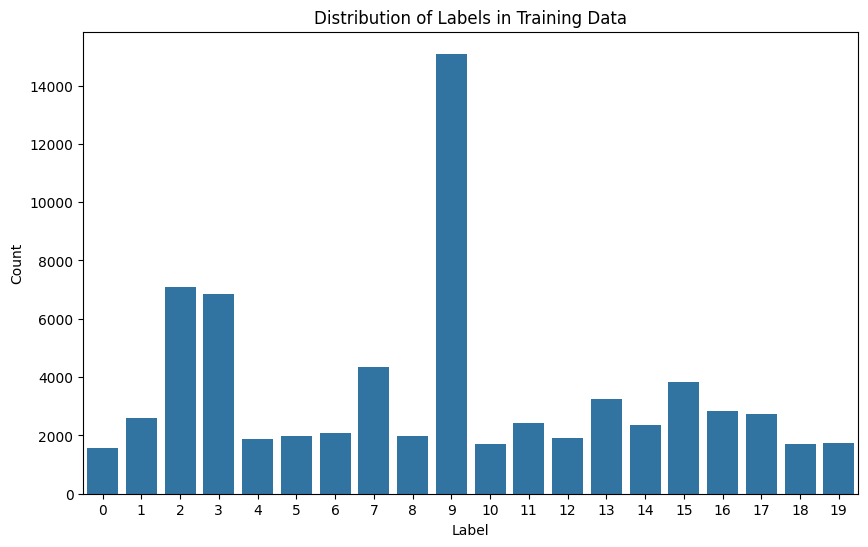

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the training data
traindf = pd.read_csv('/content/drive/MyDrive/Cognorise ML/twitter/Train.csv')

# Plot the distribution of labels
plt.figure(figsize=(10, 6))
sns.countplot(x='Label', data=traindf)
plt.title('Distribution of Labels in Training Data')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


Confusion Matrix

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 128248 (\N{CAMERA WITH FLASH}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 127876 (\N{CHRISTMAS TREE}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 128247 (\N{CAMERA}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 127482 (\N{REGIONAL INDICATOR SYMBOL LETTER U}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 127480 (\N{REGIONAL INDICATOR SYMBOL LETTER S}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seabo

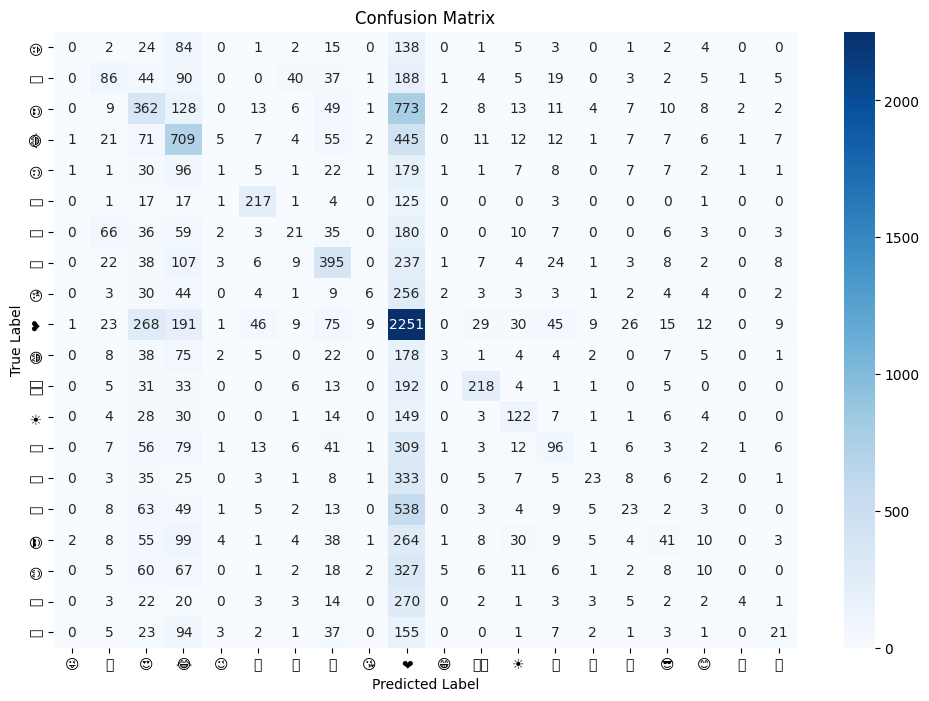

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Generate predictions on the validation set
y_val_pred = pipeline.predict(X_val)

# Compute the confusion matrix
cm = confusion_matrix(y_val, y_val_pred)

# Plot the confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=mapdf['emoticons'], yticklabels=mapdf['emoticons'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Precision, Recall, and F1-Score

<Figure size 1200x800 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128248 (\N{CAMERA WITH FLASH}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127876 (\N{CHRISTMAS TREE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128247 (\N{CAMERA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127482 (\N{REGIONAL INDICATOR SYMBOL LETTER U}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/py

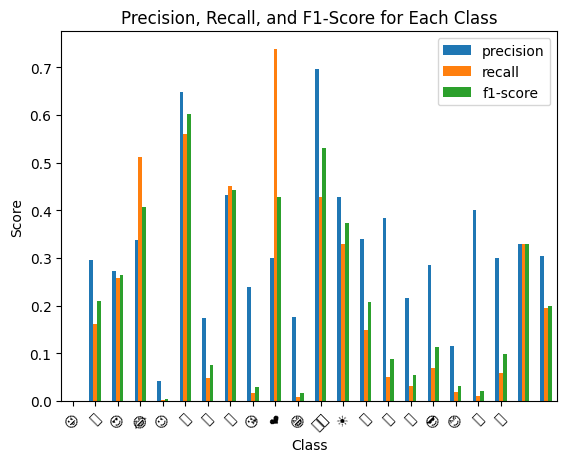

In [ ]:
from sklearn.metrics import classification_report

# Get the classification report
report = classification_report(y_val, y_val_pred, output_dict=True)

# Convert the report to a DataFrame
report_df = pd.DataFrame(report).transpose()

# Plot the precision, recall, and f1-score
plt.figure(figsize=(12, 8))
report_df[['precision', 'recall', 'f1-score']].iloc[:-1, :].plot(kind='bar')
plt.title('Precision, Recall, and F1-Score for Each Class')
plt.xlabel('Class')
plt.ylabel('Score')
plt.xticks(np.arange(len(mapdf)), mapdf['emoticons'], rotation=45)
plt.show()
